In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, Model, utils
from dsd import DSDTraining, UpdateMasks
from utils import plot_wb, wb_non_zero_percentage

# Dataset

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
train_x = train_x.reshape([train_x.shape[0], -1]) / 255.
test_x = test_x.reshape([test_x.shape[0], -1]) / 255.

train_y = utils.to_categorical(train_y, 10)
test_y = utils.to_categorical(test_y, 10)

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


# Model

In [3]:
class NN(tf.keras.Model):
    
    def __init__(self, inputs_shape= 28 * 28):
        super(NN, self).__init__()

        self.inputs_shape = inputs_shape
        
        self.fc1 = layers.Dense(512, activation="relu", kernel_initializer='glorot_uniform')
        self.fc2 = layers.Dense(10, activation="softmax", kernel_initializer='glorot_uniform')
        
        self.build_model()
        
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

    def build_model(self):
        x = layers.Input(shape=self.inputs_shape)
        return Model(inputs=[x], outputs = self.call(x))

In [4]:
tf.random.set_seed(42)
dsd_model = DSDTraining(NN(), 0.5)
dsd_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

# I/ Train on Dense

In [5]:
dsd_model.fit(train_x, train_y, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3412 - accuracy: 0.8991
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0814 - accuracy: 0.9742
Epoch 3/4
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0515 - accuracy: 0.9838
Epoch 4/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0339 - accuracy: 0.9891


Percentage of non-zero value dense: w = 100.0 | b = 100.0


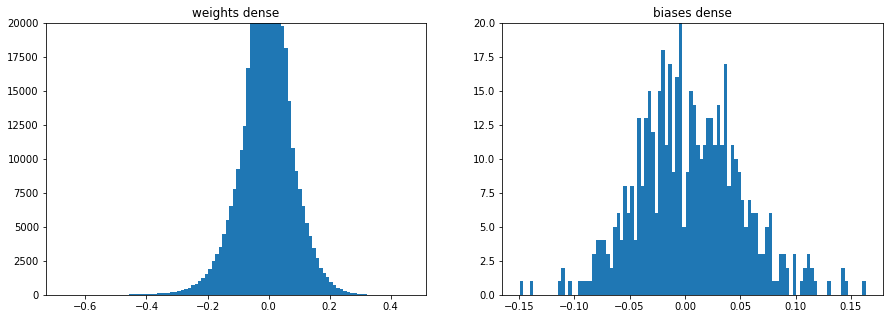

In [6]:
plot_wb(dsd_model.model)
wb_non_zero_percentage(dsd_model.model)

# II/ Train on sparse

In [7]:
dsd_model.train_on_sparse = True
dsd_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
dsd_model.fit(train_x, train_y, epochs=3, callbacks=[UpdateMasks()])

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0198 - accuracy: 0.9942
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0096 - accuracy: 0.9977
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0075 - accuracy: 0.9978


Percentage of non-zero value dense: w = 50.0 | b = 50.0


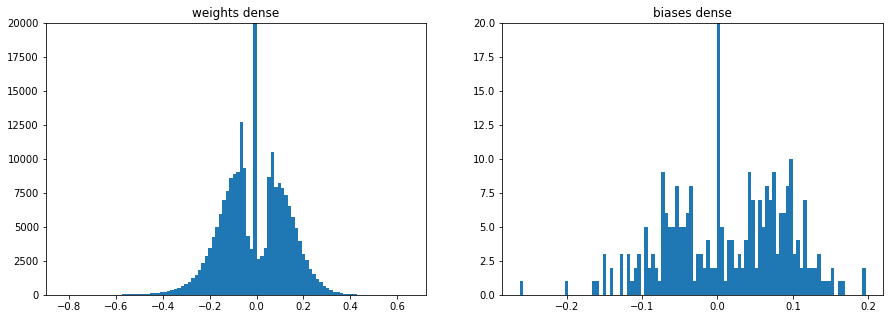

In [9]:
plot_wb(dsd_model.model)
wb_non_zero_percentage(dsd_model.model)

# III/ Train on Dense

In [10]:
dsd_model.train_on_sparse = False
dsd_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
dsd_model.fit(train_x, train_y, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0154 - accuracy: 0.9947
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0116 - accuracy: 0.9959
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0089 - accuracy: 0.9971


Percentage of non-zero value dense: w = 89.01118064413265 | b = 89.01118064413265


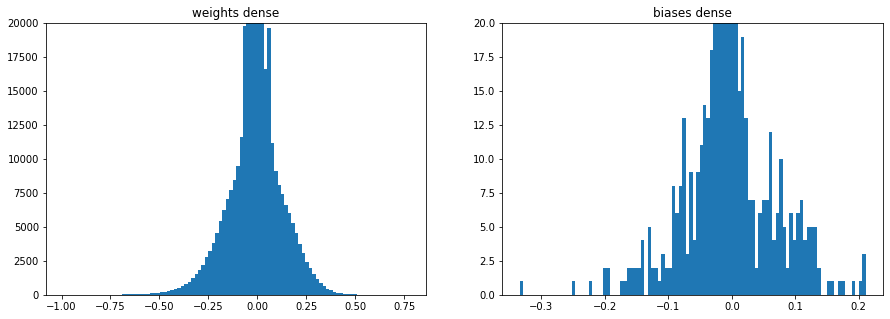

In [12]:
plot_wb(dsd_model.model)
wb_non_zero_percentage(dsd_model.model)

In [13]:
dsd_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0791 - accuracy: 0.9819


[0.07908794283866882, 0.9818999767303467]